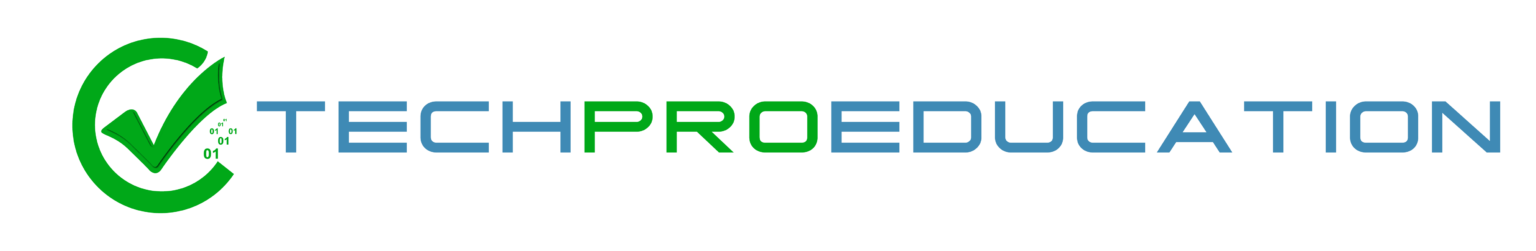

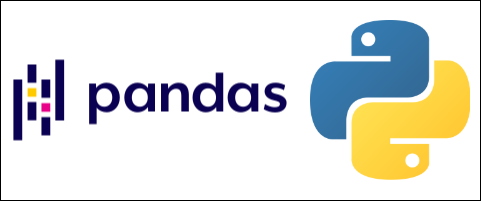

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# apply() & applymap() & map()

apply(): DataFrame veya Seri üzerinde bir satır veya sütun boyunca bir işlem yapmak için kullanılır.

applymap(): DataFrame'in tamamı üzerinde öğe bazında işlem için kullanılır.

map(): Yalnızca Seri lerde kullanılabilir ve Seri nin her bir elemanına uygulanacak bir işlem için kullanılır.

[apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)
[applymap](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html)
[map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

[SOUREC01](https://www.geeksforgeeks.org/python-pandas-apply/), 
[SOURCE02](https://www.datacamp.com/community/tutorials/pandas-apply),
[SOURCE03](https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/),
[SOURCE04](https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.),
[SOURCE05](https://www.w3resource.com/pandas/series/series-map.php),
[SOURCE06](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.),
[SOURCE07](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas) &
[SOURCE08](https://medium.com/@akaivdo/how-to-use-map-apply-applymap-methods-in-pandas-ddde5f2140bd)

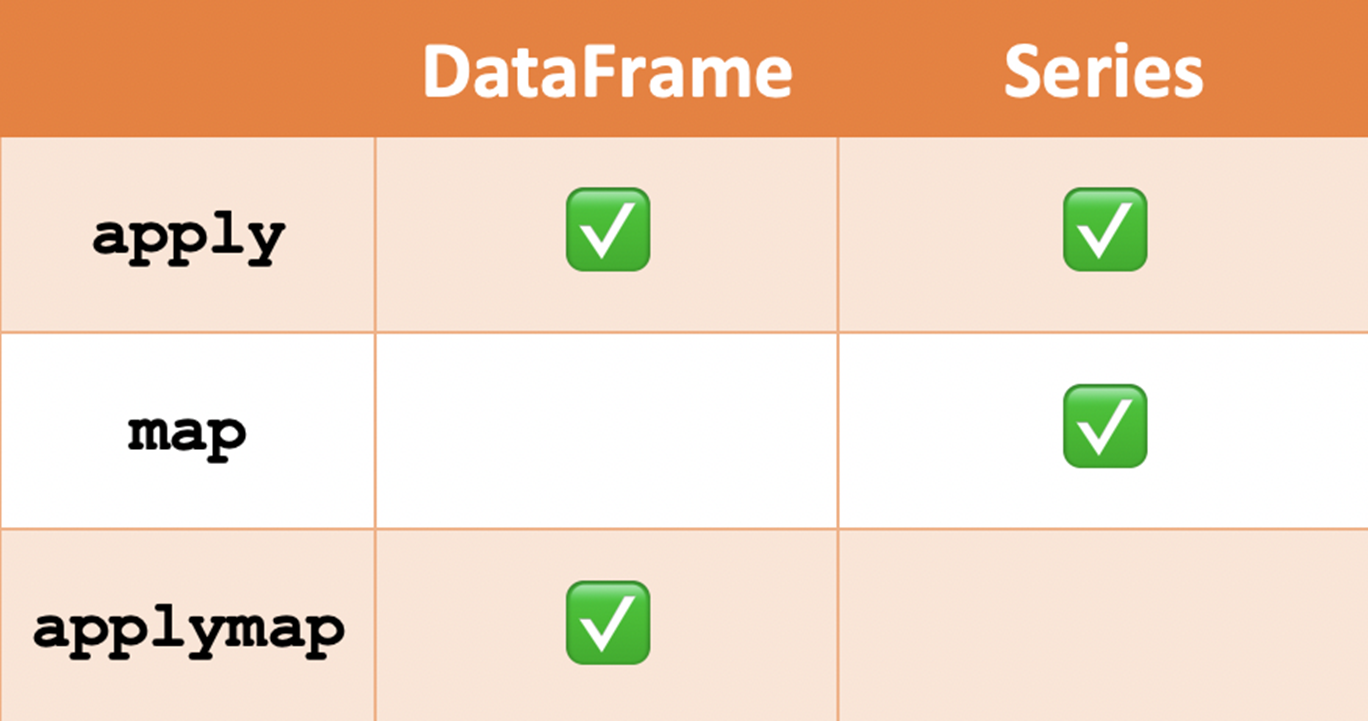

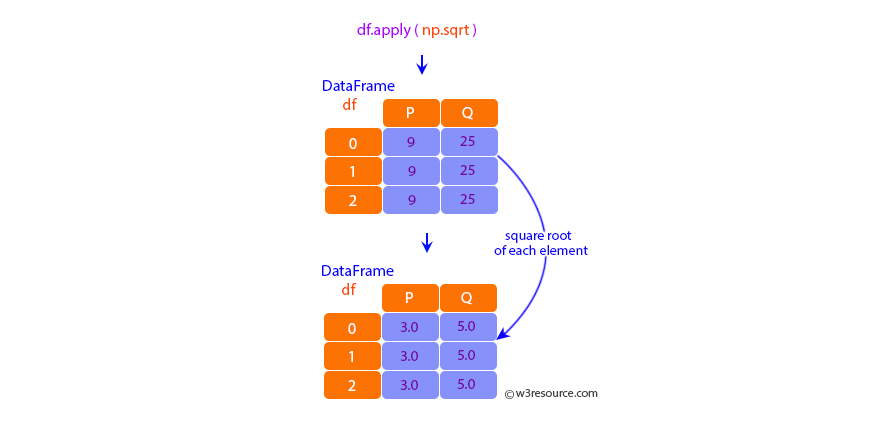

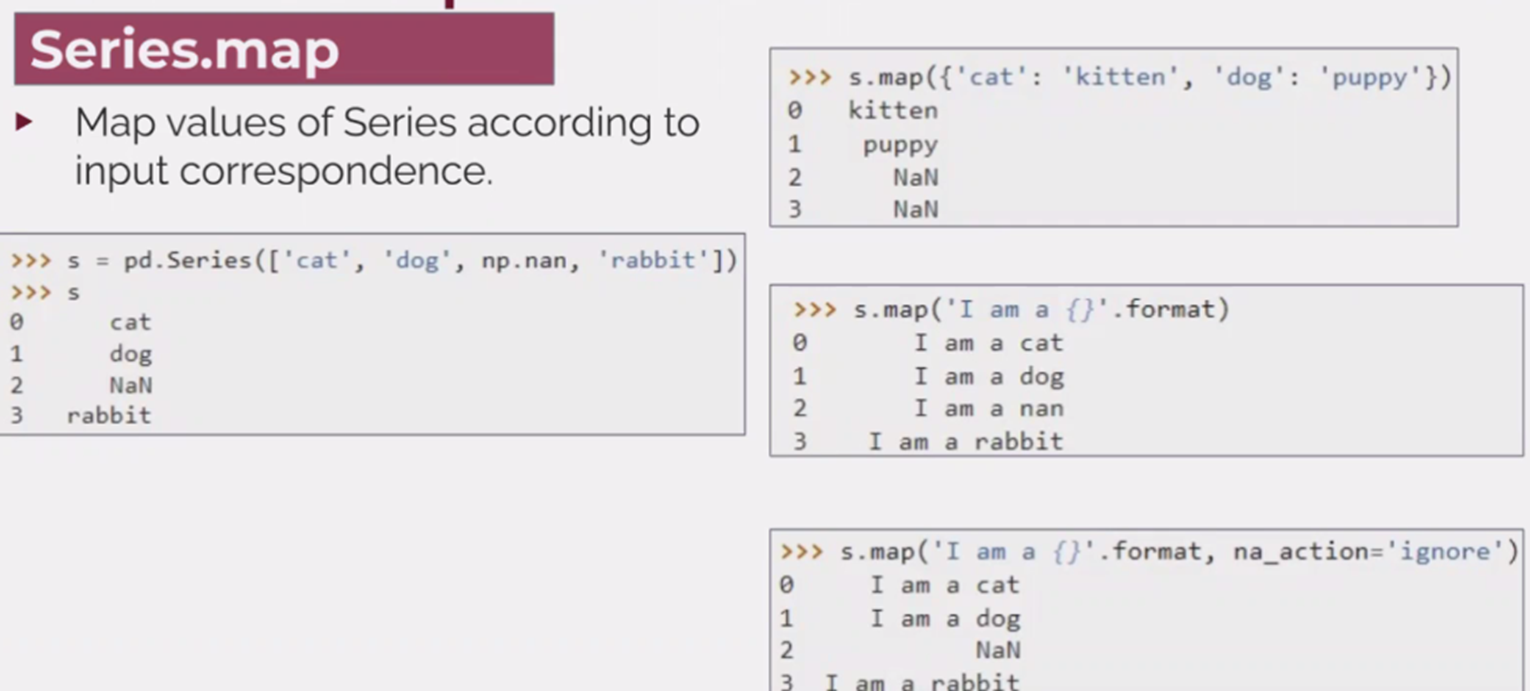

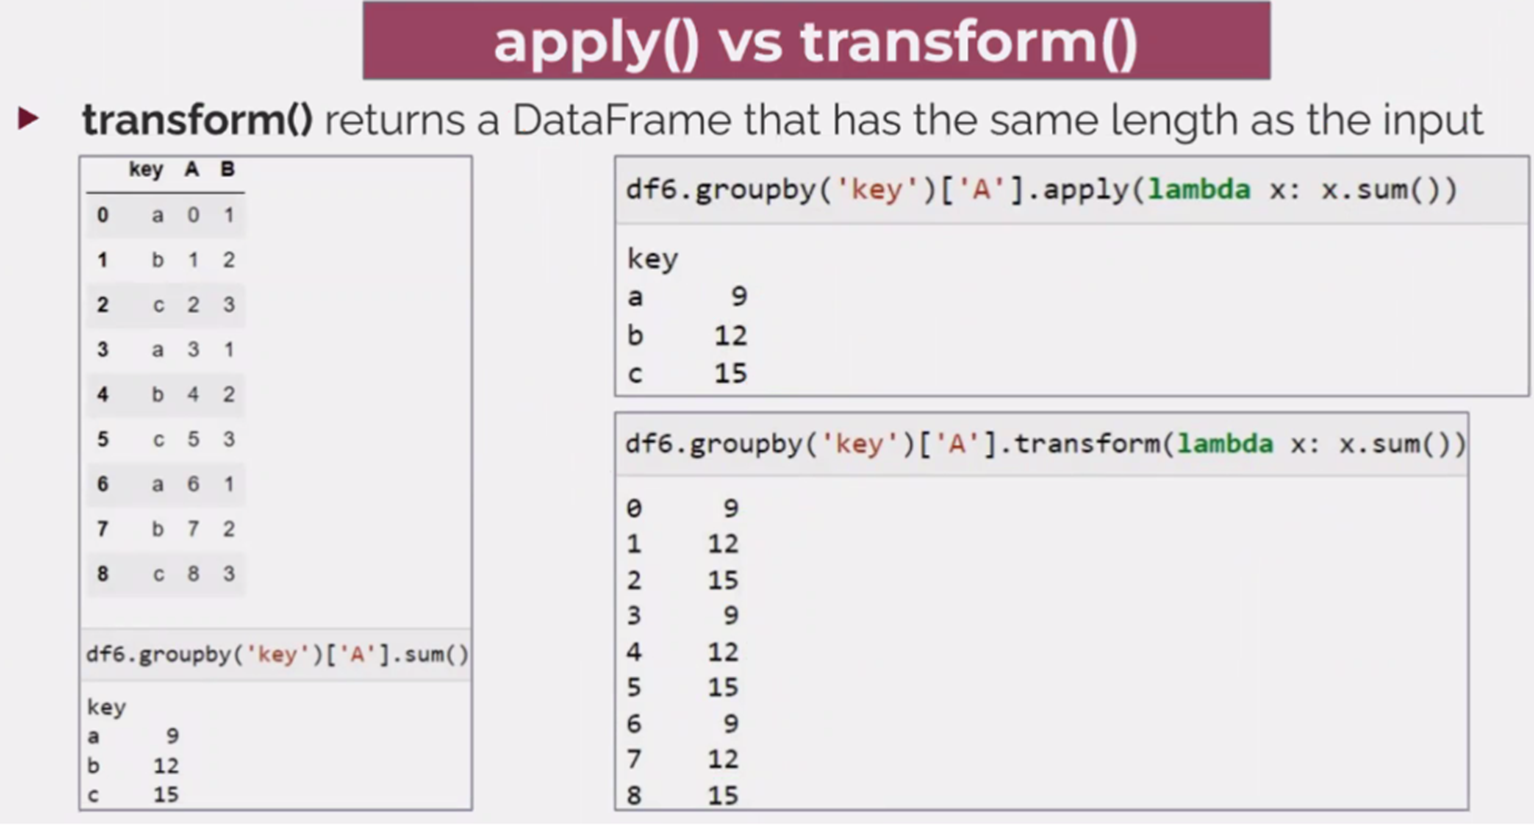

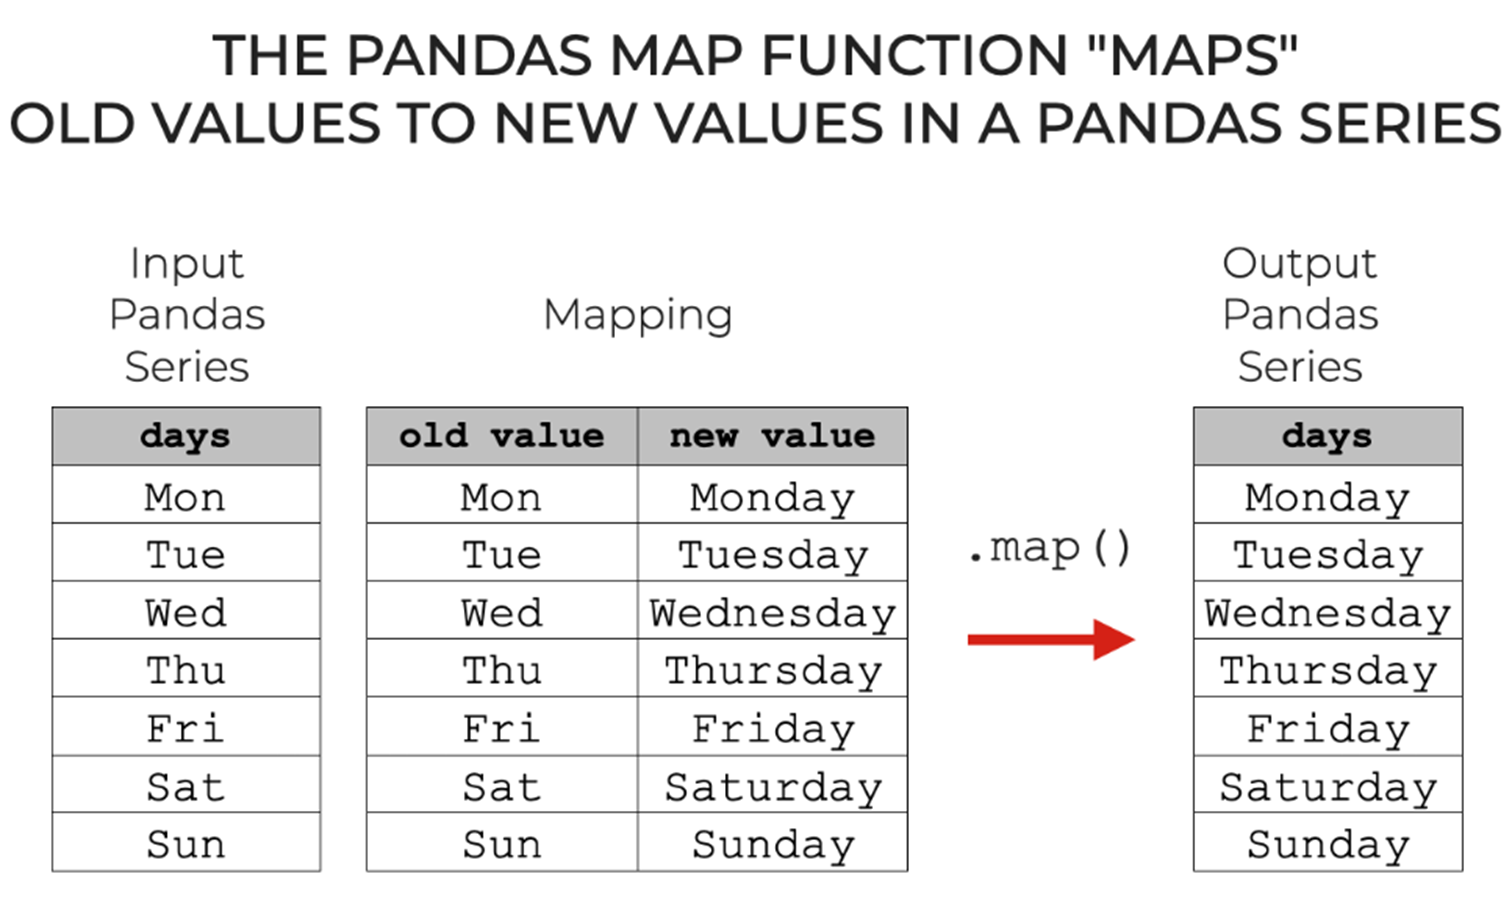

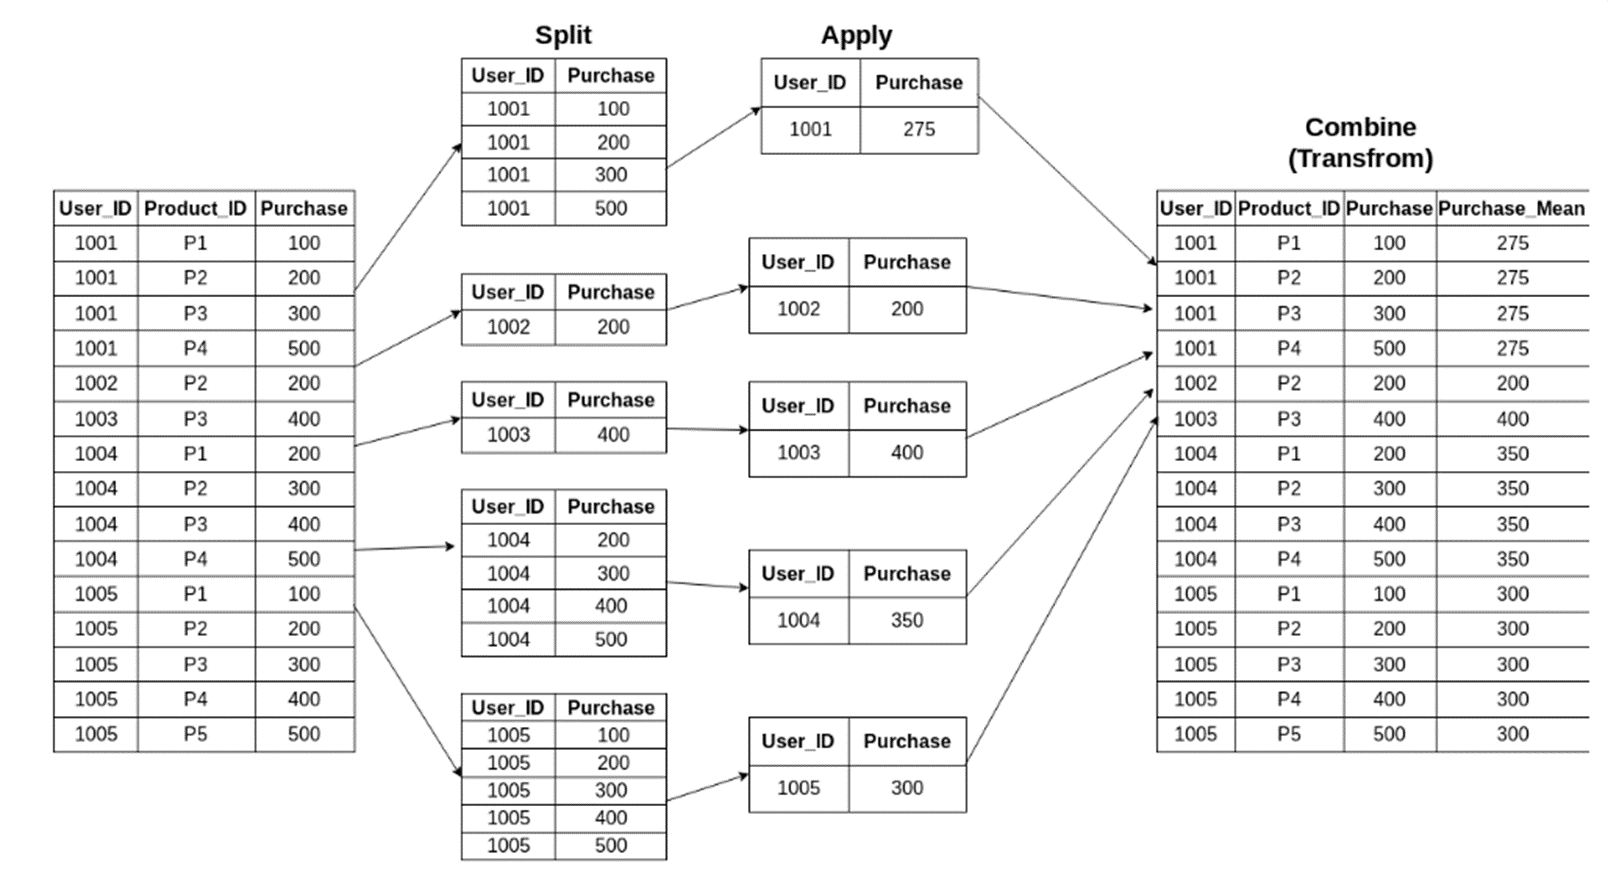

In [2]:
data = {'Company':['Amazon', 'Amazon', 'OpenAI', 'OpenAI', 'Amazon', 'OpenAI', 'Amazon', 'OpenAI'],
        'Department':['IT', 'HR', 'IT', 'HR', 'IT', 'HR', 'HR', 'IT'],
        'Person':['Ahmet', 'Ece', 'Fatma', 'Mehmet', 'Zeynep', 'Ali', 'Yusuf', 'Elif'],
        'Age':[32, 26, 35, 40, 25, 38, 30, 28],
        'Sales':[180, 160, 150, 180, 240, 200, 220, 160]}

df = pd.DataFrame(data)
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [4]:
df_num = df.iloc[:,3:]

df_num

,Age,Sales
0,32,180
1,26,160
2,35,150
3,40,180
4,25,240
5,38,200
6,30,220
7,28,160


In [6]:
df_num.applymap(lambda x: x * 10)

,Age,Sales
0,320,1800
1,260,1600
2,350,1500
3,400,1800
4,250,2400
5,380,2000
6,300,2200
7,280,1600


In [7]:
df_num.transform(lambda x: x * 10)

,Age,Sales
0,320,1800
1,260,1600
2,350,1500
3,400,1800
4,250,2400
5,380,2000
6,300,2200
7,280,1600


In [12]:
df.groupby("Company")[["Age"]].transform("mean")

,Age
0,28.25
1,28.25
2,35.25
3,35.25
4,28.25
5,35.25
6,28.25
7,35.25


In [10]:
df.groupby("Company")["Age"].applymap("mean")

AttributeError: 'SeriesGroupBy' object has no attribute 'applymap'

In [13]:
df.applymap(lambda x: len(str(x)))

,Company,Department,Person,Age,Sales
0,6,2,5,2,3
1,6,2,3,2,3
2,6,2,5,2,3
3,6,2,6,2,3
4,6,2,6,2,3
5,6,2,3,2,3
6,6,2,5,2,3
7,6,2,4,2,3


In [15]:
df.apply(lambda x: len(str(x)))

Company       124
Department     95
Person        123
Age            87
Sales          97
dtype: int64

In [14]:
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Ece,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [16]:
df_num.applymap(np.sum)

,Age,Sales
0,32,180
1,26,160
2,35,150
3,40,180
4,25,240
5,38,200
6,30,220
7,28,160


In [17]:
df_num.apply(np.sum)

Age       254
Sales    1490
dtype: int64

In [18]:
df_num.apply(np.sum, axis=1)

0    212
1    186
2    185
3    220
4    265
5    238
6    250
7    188
dtype: int64

In [20]:
df.groupby("Company").transform(np.mean)

,Age,Sales
0,28.25,200.0
1,28.25,200.0
2,35.25,172.5
3,35.25,172.5
4,28.25,200.0
5,35.25,172.5
6,28.25,200.0
7,35.25,172.5


In [21]:
df.groupby("Company").apply(np.mean)

,Age,Sales
Company,,
Amazon,28.25,200.0
OpenAI,35.25,172.5


In [ ]:
# map()

In [23]:
df.Person.map({"Ahmet" : "A", "Fatma" : "F"})

0      A
1    NaN
2      F
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
Name: Person, dtype: object

In [28]:
df

,Company,Department,Person,Age,Sales
0,Amazon,0,Ahmet,32,180
1,Amazon,1,Ece,26,160
2,OpenAI,0,Fatma,35,150
3,OpenAI,1,Mehmet,40,180
4,Amazon,0,Zeynep,25,240
5,OpenAI,1,Ali,38,200
6,Amazon,1,Yusuf,30,220
7,OpenAI,0,Elif,28,160


In [27]:
df.Department = df.Department.map({"IT" : 0, "HR" : 1})

# pivot() vs pivot_table()

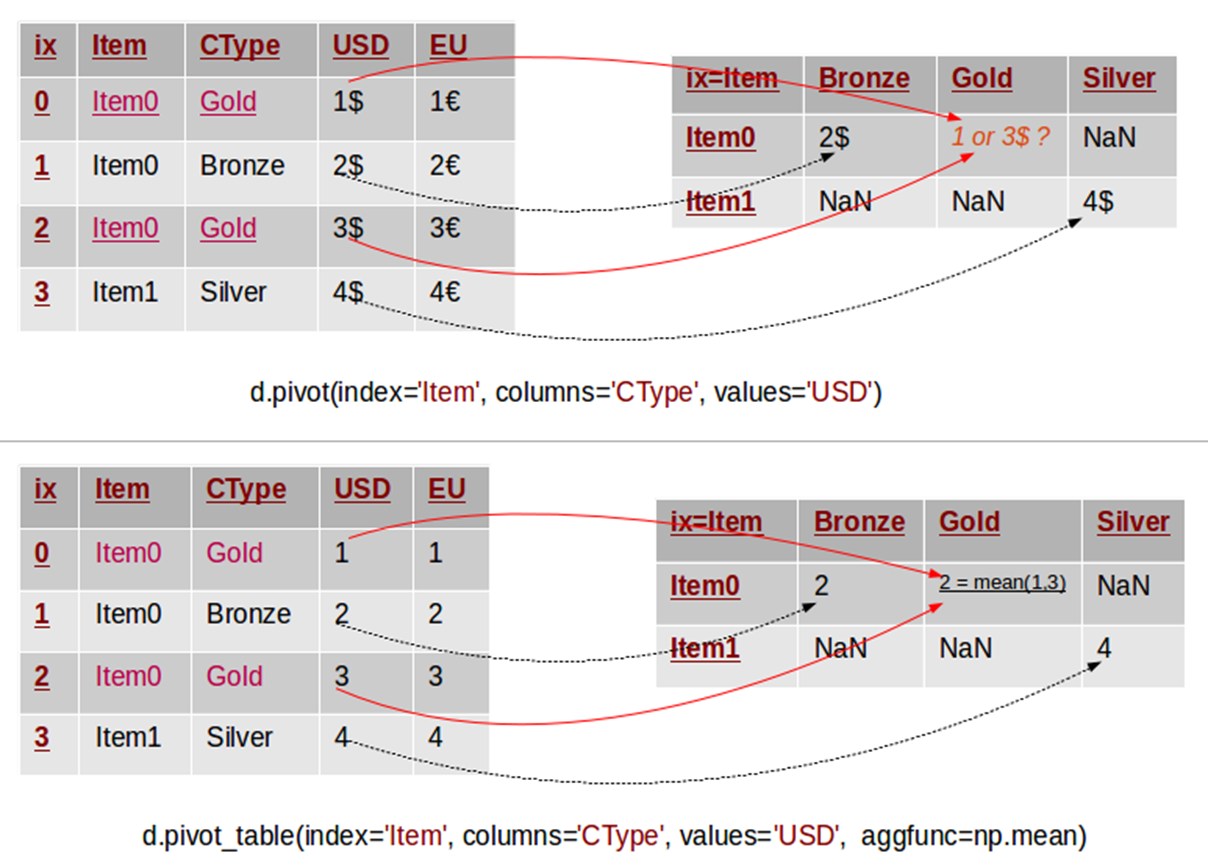

In [29]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}

df = pd.DataFrame(data)

df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [30]:
df.pivot_table(index= "gender", columns="sport", values= ["age"], aggfunc="mean")

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [31]:
df.pivot_table(index= "gender", columns="sport", values= ["age", "weight", "height"], aggfunc="mean")

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [33]:
df.pivot(index= "gender", columns="sport", values= ["age", "weight", "height"])

age                               weight                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0       62.0      NaN   58.0   
male         21.0     23.0   20.0       NaN       90.0     80.0   83.0   

                     height                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female      65.0      175.0      NaN  172.0     182.0  
male         NaN      196.0    178.0  185.0       NaN

In [35]:
df.pivot(index= "gender", columns="sport", values= "status")

sport,basketball,football,tennis,voleyball
gender,,,,
female,professional,NaN,professional,amateur
male,amateur,amateur,professional,NaN


In [36]:
df.pivot_table(index= "gender", columns="sport", values= "status")

sport
gender
female
male


In [37]:
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [38]:
df.loc[ 2  ,  "sport"   ] = "tennis"
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [39]:
df.pivot_table(index= "gender", columns="sport", values= ["age", "weight", "height"], aggfunc="mean")

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN   25.0      22.0        NaN      NaN  173.5   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0        NaN      NaN   60.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [41]:
df.pivot(index= "gender", columns="sport", values= ["age", "weight", "height"])

ValueError: Index contains duplicate entries, cannot reshape

# Type of NaN Values

NaN = Not-a-Number

np.nan, belirsiz veya tanımlanamaz sayısal değerleri temsil etmek için kullanılır.

np.nan değeri, "sentinel" bir değer olarak kabul edilir ve herhangi bir değerle, hatta kendisiyle bile karşılaştırılamaz.

Sentinel; matematiksel hesaplamalarda belirsiz veya tanımlanamaz değerleri temsil etmek için kullanılır. 

None; sentinel bir değerdir ve bir fonksiyonun veya metodun "boş" veya "tanımsız" bir değeri ifade etmesi için kullanılır. 

Sütunun data tipi object ise "nan", sayısal ise "NaN" olur.

[SOURCE01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), 
[SOURCE02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object),
[SOURCE03](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), 
[SOURCE04](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb),
[SOURCE05](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan),
[SOURCE06](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python),
[SOURCE07](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)

In [42]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })

In [43]:
df = df0.copy()
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [45]:
type(np.nan)

float

In [46]:
type(np.NaN)

float

In [47]:
type(None)

NoneType

In [48]:
pd.Series([1, np.nan, np.NaN, None, 2])

0    1.0
1    NaN
2    NaN
3    NaN
4    2.0
dtype: float64

In [49]:
print("1", 0 * np.nan)
print("2", np.nan - np.nan)
print("3", np.nan + np.nan)
print("4", np.nan - 10)
print("5", np.nan + 10)
print("6", np.nan == np.nan) 
print("7", 10 > np.nan)
print("8", np.inf > np.nan) 
print("9", float('-inf') < np.nan < float('inf'))
print("10", np.nan is np.nan)

1 nan
2 nan
3 nan
4 nan
5 nan
6 False
7 False
8 False
9 False
10 True


# Detecting Missing Values

In [50]:
df.isnull()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [51]:
df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [52]:
df.notnull()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [53]:
df.isnull().any()

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [54]:
df.isnull().any(axis=1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [55]:
df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [56]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [57]:
df.isnull().sum().sum()

9

# Converting Improper Values to NaN Values

In [58]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [60]:
df[["var1"]]

,var1
0,2
1,3
2,5
3,nan
4,7
5,1
6,nan
7,10
8,14
9,-


In [62]:
df["var1"] = df["var1"].replace(to_replace="-", value=np.nan).astype("float")

In [63]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [64]:
df["status"] = df["status"].replace(to_replace="-", value=np.nan)

In [65]:
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [66]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [67]:
df0.isnull().sum().sum()

9

In [68]:
df.isnull().sum().sum()

14

# Missing Value Handling Methods

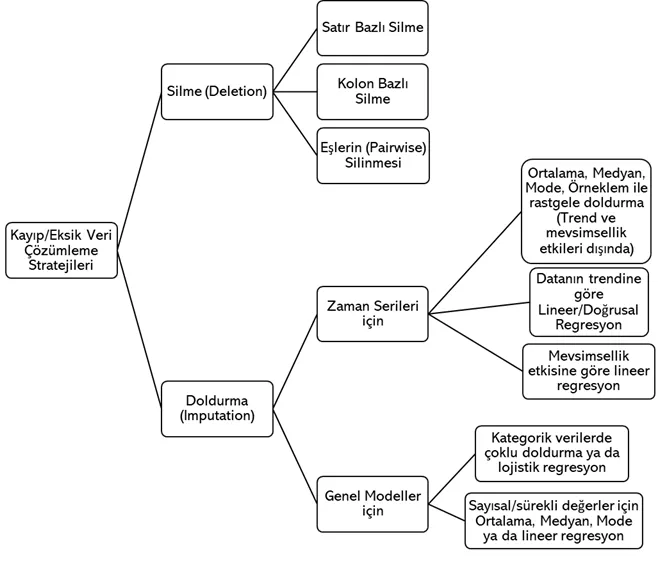

[SOURCE01](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e), 
[SOURCE02](https://www.shiksha.com/online-courses/articles/handling-missing-values-beginners-tutorial/),
[SOURCE03](https://medium.com/geekculture/how-to-deal-with-missing-values-in-machine-learning-98e47f025b9c), 
[SOURCE04](https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795)

## dropna() & drop()

In [69]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [70]:
df.dropna(axis=0, how="any", inplace=False)    # all

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [74]:
df.dropna(axis=1, thresh=9)  

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [71]:
df.dropna(axis=1, how="any", inplace=False)  

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [72]:
df.drop([1,3,5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [73]:
df.drop(["var1", "var2"], axis=1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


## Filling Missing Values (Imputation)

### Filling Numeric Variables

In [75]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [76]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [78]:
df[["var1"]].fillna(0)

,var1
0,2.0
1,3.0
2,5.0
3,0.0
4,7.0
5,1.0
6,0.0
7,10.0
8,14.0
9,0.0


In [79]:
df[["var1"]].fillna(df["var1"].mean())

,var1
0,2.0
1,3.0
2,5.0
3,6.0
4,7.0
5,1.0
6,6.0
7,10.0
8,14.0
9,6.0


In [80]:
df[["var1"]].fillna(df["var1"].median())

,var1
0,2.0
1,3.0
2,5.0
3,5.5
4,7.0
5,1.0
6,5.5
7,10.0
8,14.0
9,5.5


In [81]:
df.mean()

var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [82]:
df.fillna(df.mean())

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [83]:
df.fillna({"dept": "Other", "var1": df.var1.mean(), "var2": df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,Other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,Other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


### Filling Categorical Variables

In [84]:
df.dept.mode()

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [85]:
df.dept.mode()[0]

'AWS'

In [86]:
df.dept.fillna(df.dept.mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [87]:
df.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [88]:
df.dept.fillna(method="bfill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [90]:
df.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [89]:
df.dept.fillna(method="ffill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [91]:
df.dept.fillna(method="ffill", inplace=True)
df.dept

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

### Filling by condition & group

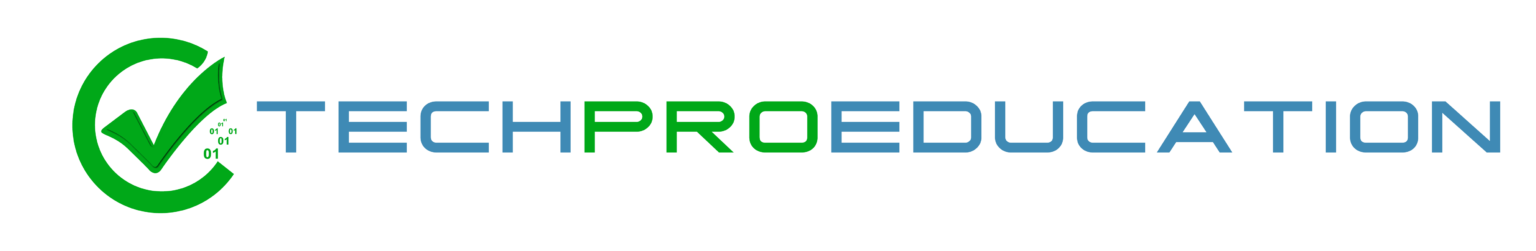